https://github.com/zalandoresearch/fashion-mnist

다운로드하여 압축을 풀고 fashion-mnist\data\fashion 디렉토리의 ~ubyte.gz 파일을 c:/data/fashion-mnist 디렉토리에 복사

In [3]:
import torch
# Default CUDA device
cuda = torch.device('cuda')

In [4]:
import gzip
import numpy as np
#이미지 압축파일을 오픈
with gzip.open('Data/train-images-idx3-ubyte.gz', 'rb') as f:
    # frombuffer(바이트배열, 자료형, 시작점)
    mnist_data=np.frombuffer(f.read(), np.uint8, offset=16)
    # 차원 변경
    mnist_data = mnist_data.reshape(-1, 784)

In [5]:
import pandas as pd
mnist_data = mnist_data / 255
pd.DataFrame(mnist_data)


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.019608,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
59998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.258824,0.211765,0.196078,0.019608,0.0,0.003922,0.0,0.0,0.0,0.0


In [6]:
#이미지의 라벨
with gzip.open('Data/train-labels-idx1-ubyte.gz', 'rb') as f:
    mnist_label=np.frombuffer(f.read(), np.uint8, offset=8)
mnist_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13036\2583926894.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


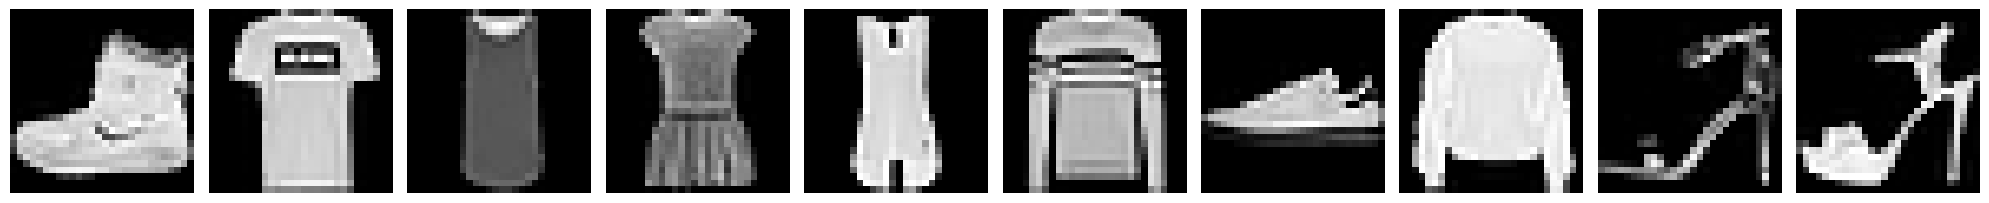

In [7]:
import matplotlib.pyplot as plt  
plt.figure(figsize=(20,3))  
for i in range(10):  
    plt.subplot(1, 10, i+1) 
    plt.imshow(mnist_data[i].reshape(28,28),cmap='gray') 
    plt.axis('off') 
    plt.tight_layout() 

plt.show()

In [8]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(mnist_data,mnist_label,test_size=0.2,random_state=10)

X_train = X_train.reshape(-1, 1, 28, 28)
X_test = X_test.reshape(-1, 1, 28, 28)


In [9]:
# 학습용 데이터 텐서 변환
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()
# 검증용 데이터 텐서 변환
X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()
# 변환된 텐서의 샘플수 확인
print(X_train.shape)
print(y_train.shape)

#텐서를 gpu로 옮기고
X_train=X_train.cuda()
y_train=y_train.cuda()
X_test=X_test.cuda()
y_test=y_test.cuda()


torch.Size([48000, 1, 28, 28])
torch.Size([48000])


In [10]:
from torch.utils.data import DataLoader, TensorDataset
# 독립변수와 종속변수 텐서를 합침
train = TensorDataset(X_train, y_train)
# 텐서의 첫 번째 데이터를 확인
print(train[0])
# 미니배치 분할
train_loader = DataLoader(train, batch_size=100, shuffle=True)

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [11]:
import torch.nn as nn
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Conv Layer
        self.conv1 = nn.Conv2d(1, 6, 5) # 입력 채널 수, 출력 채널 수, 필터 크기
        self.conv2 = nn.Conv2d(6, 16, 5)
        # Fully Connected Layer
        self.fc1 = nn.Linear(256, 64) 
        self.fc2 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 풀링 영역 크기
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, 256)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x)
   
model = Net().cuda()


In [12]:
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
for epoch in range(300):
    total_loss = 0
    for X_train, y_train in train_loader:
        X_train, y_train = Variable(X_train), Variable(y_train)     # 계산 그래프 구성
        #텐서를 gpu로 이동시킴
        X_train=X_train.cuda()
        y_train=y_train.cuda()
        # 경사 초기화
        optimizer.zero_grad()
        # 순전파 계산
        output = model(X_train)
        # 오차계산
        loss = criterion(output, y_train)
        # 역전파 계산
        loss.backward()
        # 가중치 업데이트
        optimizer.step()
        # 누적 오차 계산
        total_loss += loss.data
    # 50회 반복마다 누적 오차 출력
    if (epoch+1) % 50 == 0:
        print(epoch+1, total_loss)



C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13036\2546475322.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


50 tensor(145.4634, device='cuda:0')
100 tensor(113.1793, device='cuda:0')
150 tensor(92.7107, device='cuda:0')
200 tensor(76.2826, device='cuda:0')
250 tensor(63.9586, device='cuda:0')
300 tensor(53.0459, device='cuda:0')


In [13]:
# 계산 그래프 구성
X_test, y_test = Variable(X_test), Variable(y_test)
# 출력이 0 또는 1이 되게 함
result = torch.max(model(X_test).data, 1)[1]
# 모형의 정확도 측정
# gpu에 저장된 텐서를 cpu로 이동시킴
y_test=y_test.cpu()
result=result.cpu()
accuracy = sum(y_test.data.numpy() == result.numpy()) / len(y_test.data.numpy())

# 모형의 정확도 출력
accuracy


C:\Users\tjoeun\AppData\Local\Temp\ipykernel_13036\2546475322.py:18: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


0.8914166666666666